# Notebook 4: Kingdom Classification

## Plan for Modeling:

With modeling I will start with a Logistic Regression

In [48]:
#imports
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import hstack, unique, vstack, where
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, plot_confusion_matrix,
                             plot_roc_curve, precision_score, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import silhouette_score
from sklearn.ensemble import StackingClassifier


#warnings.filterwarnings("ignore")
np.random.seed(123)


In [49]:
#import the data

codon = joblib.load('../data/codon_after_eda.pkl')

In [50]:
sns.set_theme(style="dark")

In [51]:
codon

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,7.598900,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,7.296413,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,8.489411,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,7.557995,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,10.035918,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,vrt,0,9601,7.001246,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,vrt,1,9601,7.634337,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,vrt,1,9602,7.430707,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,vrt,0,9606,17.520819,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [52]:
codon.shape

(12964, 69)

<AxesSubplot:>

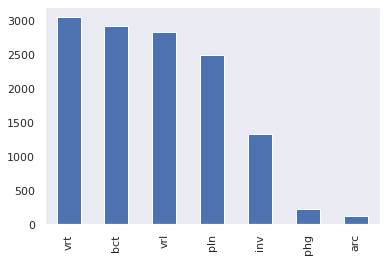

In [53]:
codon['Kingdom'].value_counts().plot(kind='bar')

<AxesSubplot:>

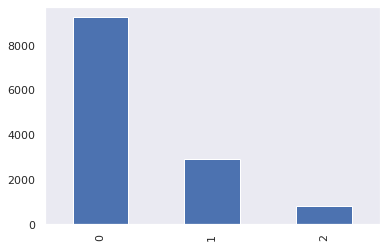

In [54]:
codon['DNAtype'].value_counts().plot(kind='bar')

In [55]:
codon.describe()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,...,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000
mean,0.349506,130573.312635,8.513725,0.024712,0.023460,0.020553,0.014084,0.017822,0.018338,0.019082,...,0.005441,0.009918,0.006431,0.024155,0.021198,0.028260,0.021707,0.001640,0.000591,0.006201
std,0.594362,124773.296344,1.647012,0.017437,0.011608,0.020605,0.009264,0.010602,0.014580,0.024299,...,0.006603,0.008575,0.006399,0.013844,0.013033,0.014348,0.015024,0.001788,0.000883,0.010363
min,0.000000,7.000000,6.908755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28897.000000,7.382591,0.013910,0.015397,0.005600,0.007090,0.010880,0.007860,0.005310,...,0.001220,0.001678,0.001160,0.012307,0.011890,0.017340,0.009747,0.000560,0.000000,0.000410
50%,0.000000,82005.000000,7.984803,0.021720,0.021920,0.015225,0.013345,0.016130,0.014600,0.009690,...,0.003520,0.009260,0.004550,0.025365,0.019105,0.026035,0.020585,0.001370,0.000420,0.001130
75%,1.000000,223048.250000,9.117731,0.031232,0.029250,0.029370,0.019790,0.022730,0.025160,0.017212,...,0.007110,0.015893,0.010300,0.034200,0.027692,0.036790,0.031160,0.002370,0.000830,0.002920
max,2.000000,465364.000000,17.520819,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


---

In [56]:
#assigning the target and features y and X

X_dna = codon.drop(columns=['Kingdom','DNAtype', 'SpeciesName']) #features
y_dna = codon['Kingdom'] #target

X_train_dna, X_test_dna, y_train_dna, y_test_dna = train_test_split(X_dna, y_dna, stratify=y_dna, test_size=0.2)

# Vanilla Models:

Plan:

Pipeline

Logistic Regression
kNN
Decision Tree


XGBoost
KMeans, check clusters
neural network analysis
k

In [57]:
#Vanilla models pipeline


estimators = [('scaler', StandardScaler()), ('model', KNeighborsClassifier())]

pipe = Pipeline(estimators)

parameters = [{'model': [KNeighborsClassifier()],
                'scaler': [StandardScaler(), MinMaxScaler()]},
                

                {'model': [LogisticRegression()],
                'scaler': [StandardScaler(), MinMaxScaler(), None]},


                {'model': [DecisionTreeClassifier()],
                'scaler': [None]}]


In [58]:
#Gridsearch for vanilla 
gridsearch_dna0 = GridSearchCV(pipe, parameters, cv=5)

#fit to train data
fittedgrid = gridsearch_dna0.fit(X_train_dna, y_train_dna)

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [59]:
dna0_results_df = pd.DataFrame.from_dict(gridsearch_dna0.cv_results_, orient='columns')
print(dna0_results_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model', 'param_scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [60]:
dna0_results_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020813,0.006832,0.098268,0.011137,KNeighborsClassifier(),StandardScaler(),"{'model': KNeighborsClassifier(), 'scaler': St...",0.933012,0.936837,0.927194,0.933944,0.933944,0.932986,0.003169,1
1,0.015507,0.000885,0.084206,0.017828,KNeighborsClassifier(),MinMaxScaler(),"{'model': KNeighborsClassifier(), 'scaler': Mi...",0.906988,0.916586,0.909836,0.912247,0.914176,0.911967,0.003335,2
2,0.183228,0.011585,0.003717,0.000127,LogisticRegression(),StandardScaler(),"{'model': LogisticRegression(), 'scaler': Stan...",0.865542,0.880424,0.891514,0.893443,0.895371,0.885259,0.011140,3
3,0.154480,0.010118,0.003117,0.000112,LogisticRegression(),MinMaxScaler(),"{'model': LogisticRegression(), 'scaler': MinM...",0.847229,0.859209,0.869817,0.862584,0.873192,0.862406,0.009076,4
5,0.458560,0.013214,0.002627,0.000114,DecisionTreeClassifier(),None,"{'model': DecisionTreeClassifier(), 'scaler': ...",0.803373,0.799904,0.817743,0.810993,0.829797,0.812362,0.010685,5
4,0.040086,0.003082,0.002577,0.000204,LogisticRegression(),None,"{'model': LogisticRegression(), 'scaler': None}",0.218313,0.218419,0.218901,0.218419,0.218419,0.218494,0.000207,6


## Logistic Regression:

Distributions before and after SMOTE upsampling:


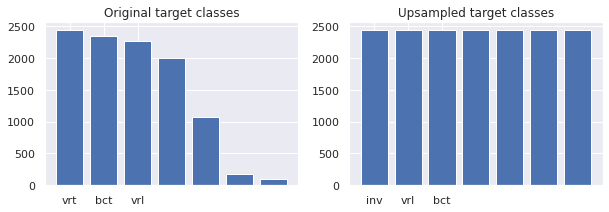

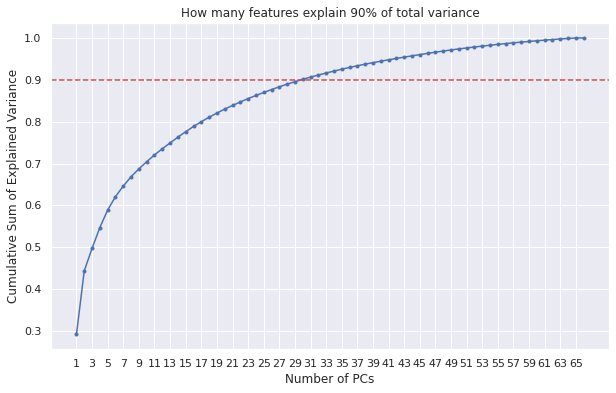

In [61]:
sns.set_theme(style="darkgrid")
#Using SMOTE to balance the classes:

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_dna, y_train_dna)

#Plotting distributions
print('Distributions before and after SMOTE upsampling:')
plt.subplots(1, 2, figsize=(10, 3))

    # Plot the original data
plt.subplot(1,2,1)
plt.bar(y_train_dna.value_counts().index, y_train_dna.value_counts())
plt.title('Original target classes')
plt.xticks(ticks=[0, 1, 2])

    # Plot the upsampled data
plt.subplot(1,2,2)
plt.bar(y_train_sm.value_counts().index, y_train_sm.value_counts())
plt.title('Upsampled target classes')
plt.xticks(ticks=[0, 1, 2])
plt.show()

print('==============================================================================')

#scaling data for PCA tranform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm) #scaling the upsampled set
X_test_scaled = scaler.transform(X_test_dna)

#PCA dimensionality reduction
pca = PCA()

# fit transform train set and transform test set
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_ #to see the number of features that account for the highest variance

#cumulative sum of the explained variance
cumulative_sum = np.cumsum(explained_variance)

#plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train_dna.columns)+1), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1, len(X_train_dna.columns)+1, 2))
plt.title("How many features explain 90% of total variance")
plt.show()



In [74]:
#setting n_components and refitting a PCA

pca_0 = PCA(n_components= 29)

# fit transform train set and transform test set
X_train_PCA_0 = pca_0.fit_transform(X_train_scaled)
X_test_PCA_0 = pca_0.transform(X_test_scaled)

In [63]:
#regularisation:

c_params = [0.0001, 0.001, 0.01, 0.1, 1, 10]

train_accuracies = []
test_accuracies = []

for c in c_params:
    log_reg_dna = LogisticRegression(C=c, max_iter= 10000)

    log_reg_dna.fit(X_train_PCA_0, y_train_sm)

    train_accuracies.append(log_reg_dna.score(X_train_PCA_0, y_train_sm))
    test_accuracies.append(log_reg_dna.score(X_test_PCA_0, y_test_dna))

Text(0.5, 1.0, 'Accuracies for log_reg_dna model')

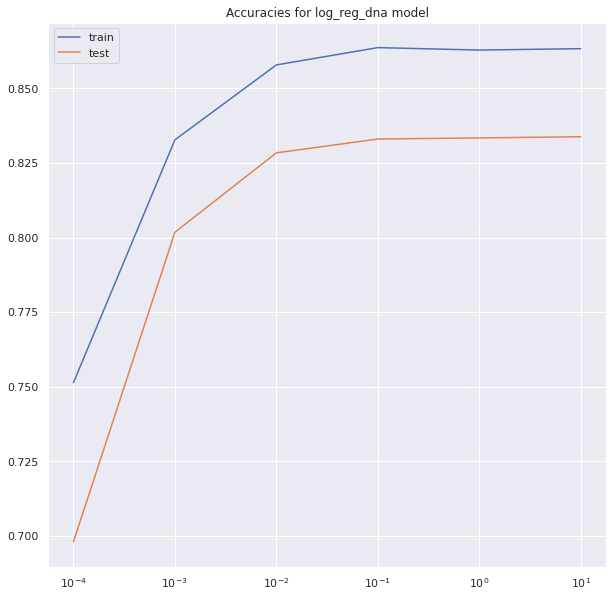

In [64]:
plt.figure(figsize=(10, 10))
plt.plot(c_params, train_accuracies, label = 'train')
plt.plot(c_params, test_accuracies, label = 'test')
plt.xscale('log')
plt.legend()
plt.title('Accuracies for log_reg_dna model')

In [65]:
#For C =0.001

log_reg_dna_0 = LogisticRegression(C=0.001, max_iter= 10000)

log_reg_dna_0.fit(X_train_PCA_0, y_train_sm)

print(log_reg_dna_0.score(X_train_PCA_0, y_train_sm))
print(log_reg_dna_0.score(X_test_PCA_0, y_test_dna))

0.8327368729832796
0.8017740069417663


In [66]:
y_train_dna.value_counts().index

Index(['vrt', 'bct', 'vrl', 'pln', 'inv', 'phg', 'arc'], dtype='object')

,Predicted vrt,Predicted bct,Predicted vrl,Predicted pln,Predicted inv,Predicted phg,Predicted arc
True vrt,22,3,0,0,0,0,0
True bct,29,472,4,61,9,8,1
True vrl,3,13,163,2,51,25,10
True pln,3,5,0,36,0,0,0
True inv,0,12,45,26,370,32,13
True phg,6,11,32,6,35,464,12
True arc,1,1,22,3,8,22,552


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


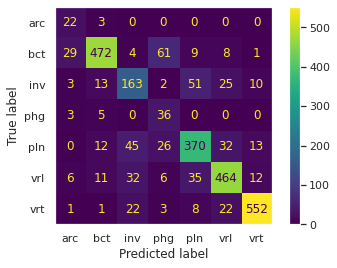

In [68]:
sns.set_theme(style="dark")
y_predicted = log_reg_dna_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_dna, y_predicted)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted vrt", "Predicted bct", "Predicted vrl", "Predicted pln", "Predicted inv", "Predicted phg", "Predicted arc"],
    index=["True vrt", "True bct", "True vrl", "True pln", "True inv", "True phg", "True arc"])

display(cf_df)

plot_confusion_matrix(log_reg_dna_0, X_test_PCA_0, y_test_dna)

In [69]:
class_report_log_0 = classification_report(y_test_dna, y_predicted)
print(class_report_log_0)

              precision    recall  f1-score   support

         arc       0.34      0.88      0.49        25
         bct       0.91      0.81      0.86       584
         inv       0.61      0.61      0.61       267
         phg       0.27      0.82      0.40        44
         pln       0.78      0.74      0.76       498
         vrl       0.84      0.82      0.83       566
         vrt       0.94      0.91      0.92       609

    accuracy                           0.80      2593
   macro avg       0.67      0.80      0.70      2593
weighted avg       0.83      0.80      0.81      2593



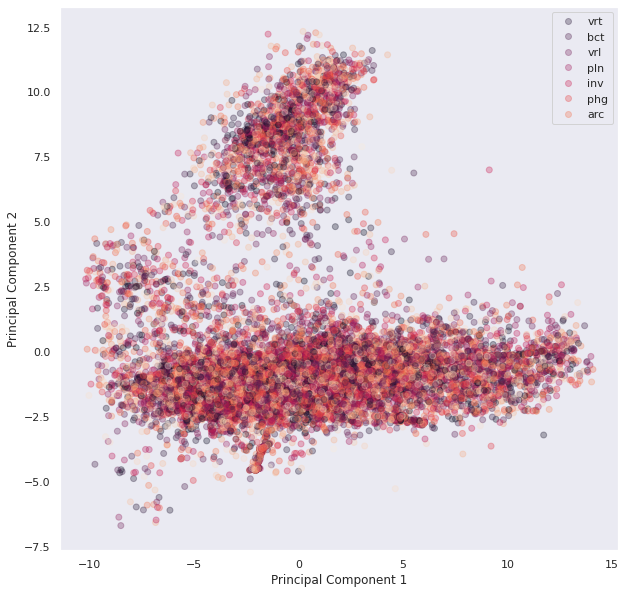

In [84]:
#Visualising the PCA components in a scatter graph
plt.figure(figsize=(10, 10))
N = 17045
colours = np.random.rand(N)
scatter = plt.scatter(X_train_PCA_0[:, 0], X_train_PCA_0[:, 1], alpha=0.3, c= colours )
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
classes = ["vrt", "bct", "vrl", "pln", "inv", "phg", "arc"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

## kNearest Neighbors model:

In [86]:
#using the already scaled and PCA tranformed sets from previous model

#Determining the ideal n_neighbors value:

n_neighbors = range(1, 100, 2)

train_accuracies_0 = []
test_accuracies_0 = []

for n in n_neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train_PCA_0, y_train_sm)
    
    train_accuracies_0.append(KNN_model.score(X_train_PCA_0, y_train_sm))
    test_accuracies_0.append(KNN_model.score(X_test_PCA_0, y_test_dna))

Text(0.5, 1.0, 'Accuracies for KNN_model')

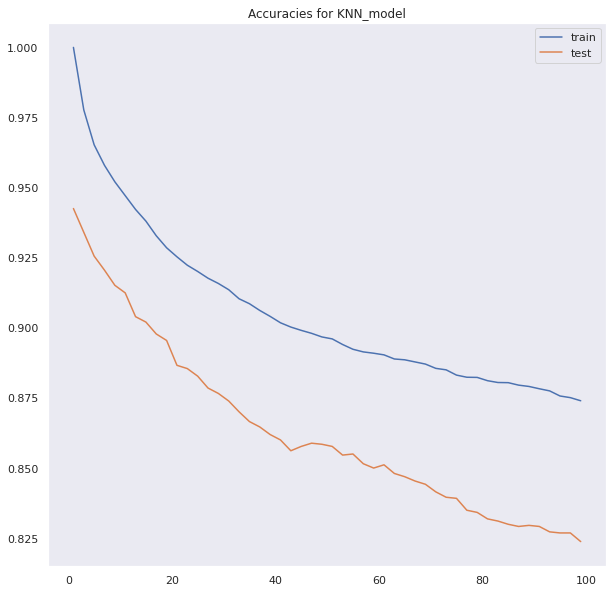

In [87]:
plt.figure(figsize=(10, 10))
plt.plot(n_neighbors, train_accuracies_0, label = 'train')
plt.plot(n_neighbors, test_accuracies_0, label = 'test')
plt.legend()
plt.title('Accuracies for KNN_model')

In [88]:
Knn_accuracies_df = pd.DataFrame({'number of neighbors':n_neighbors, 'Train scores':train_accuracies_0, 'Test scores': test_accuracies_0})
Knn_accuracies_df.head(5)


,number of neighbors,Train scores,Test scores
0,1,1.000000,0.942538
1,3,0.977706,0.934053
2,5,0.965268,0.925569
3,7,0.957935,0.920555
4,9,0.952068,0.915156


In [89]:
KNN_model_0 = KNeighborsClassifier(n_neighbors = 1)
KNN_model_0.fit(X_train_PCA_0, y_train_sm)

print(KNN_model_0.score(X_train_PCA_0, y_train_sm))
print(KNN_model_0.score(X_test_PCA_0, y_test_dna))

1.0
0.9425376012340918


,Predicted vrt,Predicted bct,Predicted vrl,Predicted pln,Predicted inv,Predicted phg,Predicted arc
True vrt,21,3,1,0,0,0,0
True bct,5,545,8,20,2,4,0
True vrl,0,3,240,0,8,8,8
True pln,3,4,0,37,0,0,0
True inv,0,6,12,5,466,4,5
True phg,2,3,8,2,11,539,1
True arc,0,0,6,0,3,4,596


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


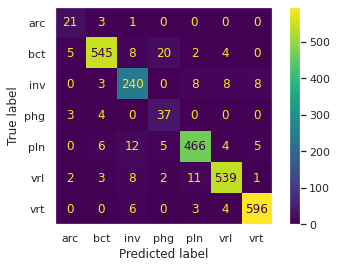

In [91]:
y_predicted_0 = KNN_model_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix_0 = confusion_matrix(y_test_dna, y_predicted_0)

# label rows and columns
cf_df_0 = pd.DataFrame(
    cf_matrix_0, 
    columns=["Predicted vrt", "Predicted bct", "Predicted vrl", "Predicted pln", "Predicted inv", "Predicted phg", "Predicted arc"],
    index=["True vrt", "True bct", "True vrl", "True pln", "True inv", "True phg", "True arc"])

display(cf_df_0)

plot_confusion_matrix(KNN_model_0, X_test_PCA_0, y_test_dna)

In [92]:
class_report_knn_0 = classification_report(y_test_dna, y_predicted_0)
print(class_report_knn_0)

              precision    recall  f1-score   support

         arc       0.68      0.84      0.75        25
         bct       0.97      0.93      0.95       584
         inv       0.87      0.90      0.89       267
         phg       0.58      0.84      0.69        44
         pln       0.95      0.94      0.94       498
         vrl       0.96      0.95      0.96       566
         vrt       0.98      0.98      0.98       609

    accuracy                           0.94      2593
   macro avg       0.86      0.91      0.88      2593
weighted avg       0.95      0.94      0.94      2593



## Naives Bayes

## Ensemble Model

In [ ]:
# We instantiate the base models, along with their names
base_models = [('KNN', KNeighborsClassifier()),
               ('SVM', SVC(kernel='linear', probability=True)),
               ('XGBoost', SVC(kernel='rbf', probability=True))]


# building the stacked model
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(penalty='l1', solver='saga'))

stacked_model.fit(X_train_dna, y_train_dna)

---

In [ ]:
print(f'train score: {knnquick.score(X_train_dna, y_train_dna)}')
print(f'test score: {knnquick.score(X_test_dna, y_test_dna)}')

NameError: name 'knnquick' is not defined

In [ ]:
#PCA dimensionality reduction
#Scaling the data:
    # instantiate scaler
data_scaler = StandardScaler()
    # fit scaler
X_train_dna_scaled = data_scaler.fit_transform(X_train_dna)
X_test_dna_scaled = data_scaler.transform(X_test_dna)

# PCA with n_components to explain 90% of the variance in the data 
    # instantiate 
pca = PCA(n_components=0.9)

#fit and Tranform train and transform test
X_train_dna_pca = pca.fit_transform(X_train_dna_scaled)
X_test_dna_pca = pca.transform(X_test_dna_scaled)

In [ ]:
knnquickscale = KNeighborsClassifier(n_neighbors=2)

knnquickscale.fit(X_train_dna_scaled, y_train_dna)

print(f'train score: {knnquickscale.score(X_train_dna_scaled, y_train_dna)}')
print(f'test score: {knnquickscale.score(X_test_dna_scaled, y_test_dna)}')

train score: 0.9979751229389644
test score: 0.9953721558040879


In [ ]:
X_train_dna_pca.shape

(10371, 31)

In [ ]:
y_train_dna.shape

(10371,)

In [ ]:
def PlotBoundaries(model, X, Y, plotsize=(6,4)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=plotsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

In [ ]:
PlotBoundaries(knnquickscale, X_dna, y_dna, plotsize=(6,4))

InvalidIndexError: (slice(None, None, None), 0)

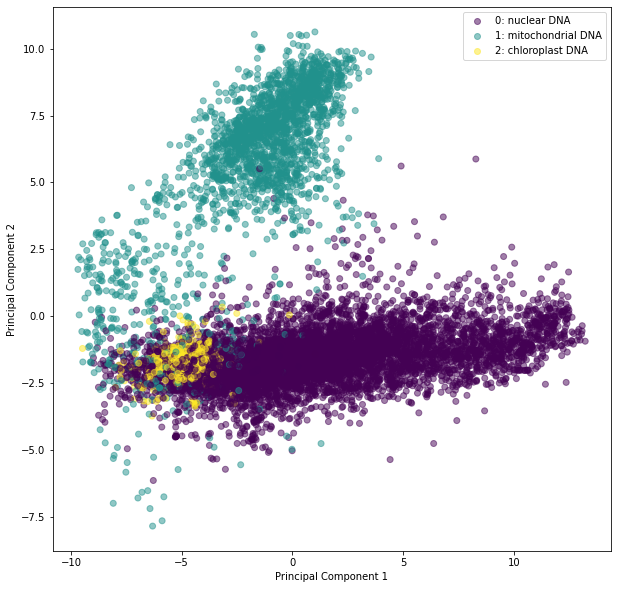

In [ ]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_train_dna_pca[:, 0], X_train_dna_pca[:, 1], alpha=0.5, c=y_train_dna)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
classes = ['0: nuclear DNA', '1: mitochondrial DNA', '2: chloroplast DNA']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100


In [ ]:
fig = px.scatter_3d(
    X_train_dna_pca, x=0, y=1, z=2, color=y_train_dna,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
neighbors = range(1, 100, 2) # Only try odd numbers of neighbours

train_acc = []
test_acc = []

for n in neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train_dna_pca, y_train_dna)
    
    train_acc.append(KNN_model.score(X_train_dna_pca, y_train_dna))
    test_acc.append(KNN_model.score(X_test_dna_pca, y_test_dna))

Text(0.5, 1.0, 'Accuracies on SCALED data')

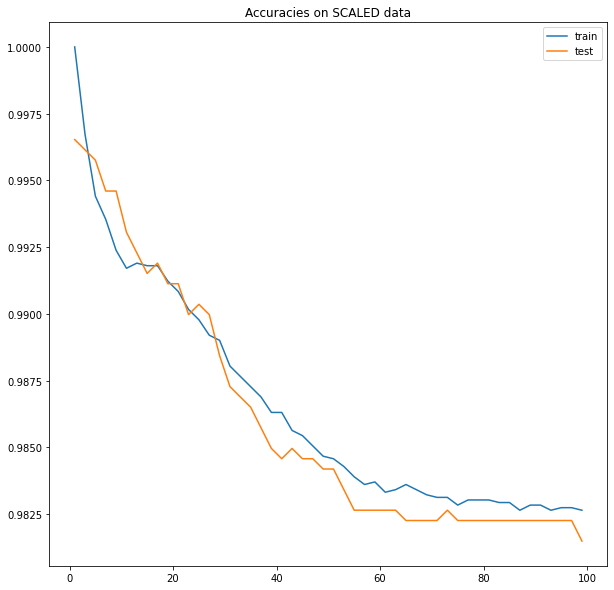

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(neighbors, train_acc, label = 'train')
plt.plot(neighbors, test_acc, label = 'test')
plt.legend()
plt.title('Accuracies on SCALED data')

In [ ]:
#Instantiate the mode
knn_optimised = KNeighborsClassifier(n_neighbors = 10)

#fit the model
knn_optimised.fit(X_train_dna_pca, y_train_dna)

print(f"Score on training set: {knn_optimised.score(X_train_dna_pca, y_train_dna):0.3f}")
print(f"Score on test set: {knn_optimised.score(X_test_dna_pca, y_test_dna):0.3f}")

Score on training set: 0.992
Score on test set: 0.993


In [ ]:
# Get class predictions
y_pred = knn_optimised.predict(X_test_dna_pca)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_dna, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"]
)

display(cf_df)

,Predicted 0,Predicted 1,Predicted 2
True 0,1847,0,3
True 1,3,573,4
True 2,7,0,156


<Figure size 720x720 with 0 Axes>

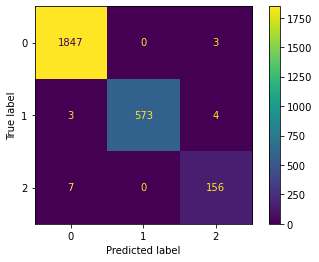

In [ ]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(knn_optimised, X_test_dna_pca, y_test_dna)
plt.show()

In [ ]:
knn_optimised.

<10371x10371 sparse matrix of type '<class 'numpy.float64'>'
	with 103710 stored elements in Compressed Sparse Row format>

In [ ]:
#vanilla regression 

reg_model_vanilla = LogisticRegression(C = 2, solver='lbfgs', random_state=123)

reg_model_vanilla.fit(X_train_dna, y_train_dna)

print(f"Score on training set: {reg_model_vanilla.score(X_train_dna, y_train_dna):0.3f}")
print(f"Score on test set: {reg_model_vanilla.score(X_test_dna, y_test_dna):0.3f}")

Score on training set: 0.713
Score on test set: 0.713
